In [2]:
import us
import pandas as pd
import geopandas
import numpy as np

from shapely.geometry import Point
from geopandas.plotting import plot_point_collection
from litecoder.models import WOFLocality

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
mpl.style.use('seaborn-muted')

In [6]:
df = pd.read_table('../data/Gaz_places_national.txt', encoding='ISO-8859-1')

In [7]:
df.head(10)

,USPS,GEOID,ANSICODE,NAME,LSAD,FUNCSTAT,POP10,HU10,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,AL,100100,2582661,Abanda CDP,57,S,192,79,7764035,34284,2.998,0.013,33.091627,-85.527029
1,AL,100124,2403054,Abbeville city,25,A,2688,1255,40255352,107642,15.543,0.042,31.564216,-85.259634
2,AL,100460,2403063,Adamsville city,25,A,4522,1990,65083153,29719,25.129,0.011,33.605750,-86.974650
3,AL,100484,2405123,Addison town,43,A,758,351,9753286,83426,3.766,0.032,34.202689,-87.177901
4,AL,100676,2405125,Akron town,43,A,356,205,1778126,13850,0.687,0.005,32.879417,-87.741757
5,AL,100820,2403069,Alabaster city,25,A,30352,11295,64860720,747585,25.043,0.289,33.214355,-86.823080
6,AL,100988,2403074,Albertville city,25,A,21160,8128,68780663,258708,26.556,0.100,34.263130,-86.210660
7,AL,101132,2403077,Alexander City city,25,A,14875,6834,105771865,737649,40.839,0.285,32.927240,-85.937122
8,AL,101180,2402638,Alexandria CDP,57,S,3917,1599,28786548,33123,11.115,0.013,33.765175,-85.879596
9,AL,101228,2403080,Aliceville city,25,A,2486,1164,11814094,0,4.561,0.000,33.123744,-88.159445


In [8]:
df['point'] = df.apply(lambda r: Point(r.INTPTLONG, r.INTPTLAT), axis=1)

In [9]:
gdf = geopandas.GeoDataFrame(df, geometry='point')

In [10]:
states = geopandas.read_file('../data/cb_2017_us_state_5m/cb_2017_us_state_5m.shp')

In [15]:
def plot_state(state):
    ax = states[states.STUSPS==state].plot(color='white', edgecolor='black', figsize=(20,20))
    sdf = gdf[gdf.USPS==state]
    plot_point_collection(ax, sdf.point, markersize=sdf.POP10 / 500, alpha=0.3, cmap='Reds', edgecolor='black')

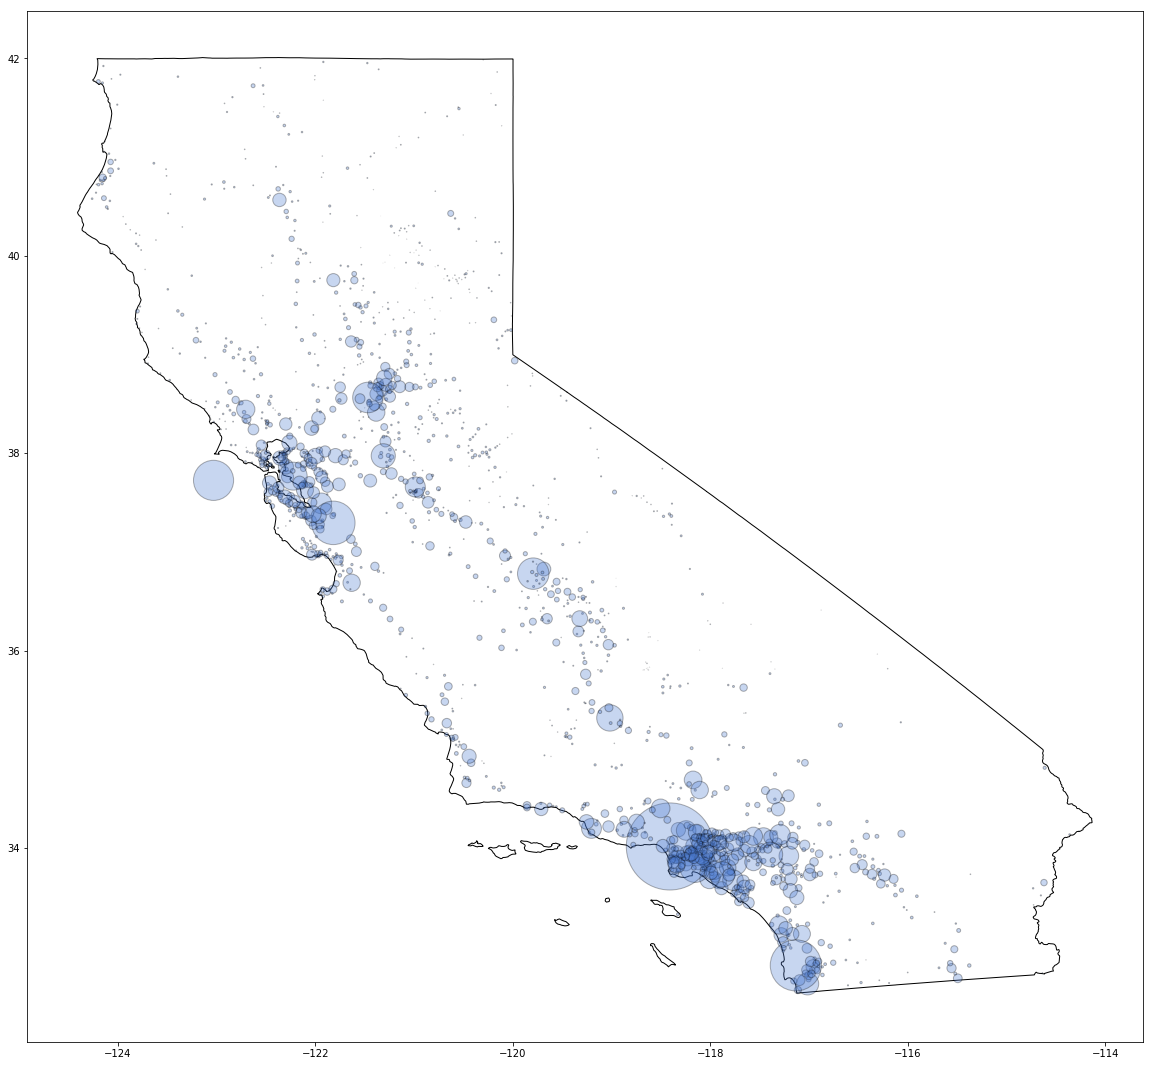

In [18]:
plot_state('CA')

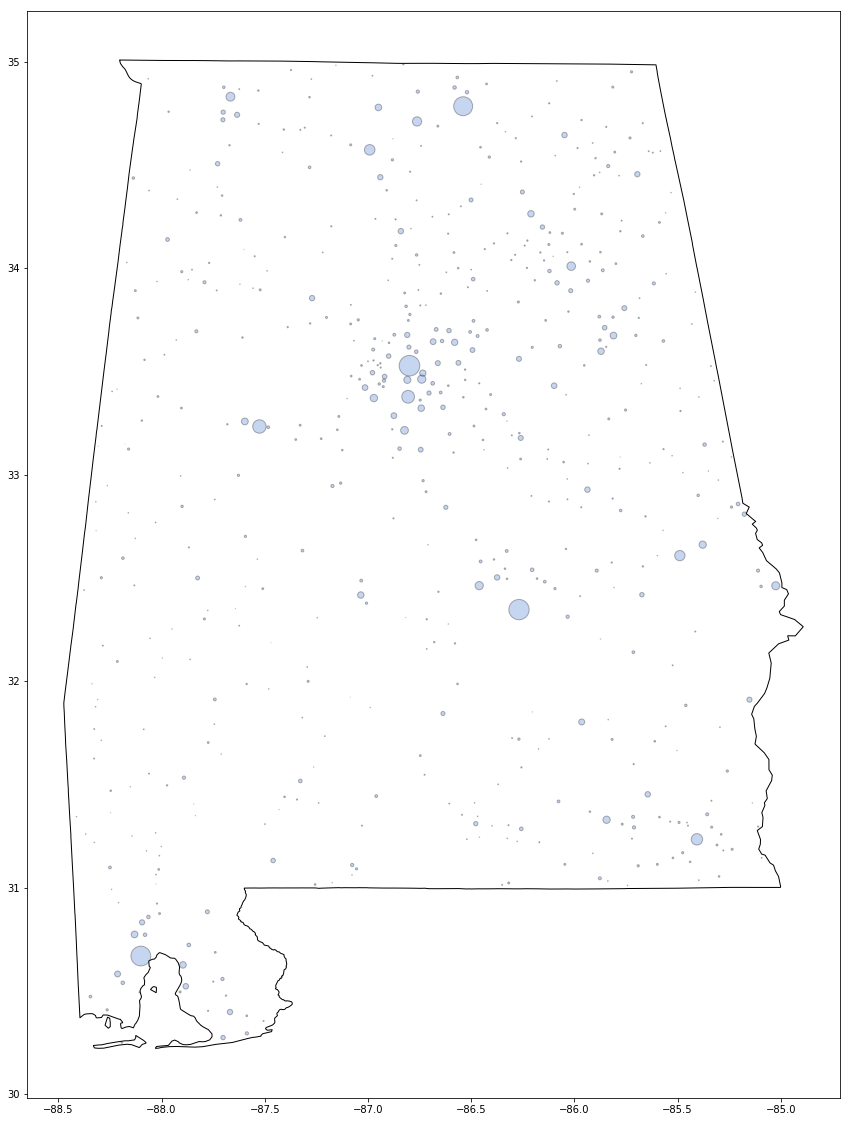

In [19]:
plot_state('AL')